In [23]:
'''
Data Mining Steps Summary
'''
# Step 1. Problem Understanding : 
# Feature ? Target ? Classification or Regression 
# Step 2.  Data Understanding : 
# Missing Values ? Outlier(Noise) ? Inconsistent ? Imbalanced ? Skewness ? 
# Step 3. Feature Understanding :  
# EDA with Visualization on Univariate, BiVariate and MultiVariate Analysis
# Step 4. Feature Engineering : 
# Skewness/Inconsistent/Missing/Outlier Handling, 
# Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding, 
# Feature Scaling (Normalization & Standardization)
# Step 5. Dataset Partition : 
# Imbalanced Handling, Train Test Split 
# Step 6. Data Modelling : 
# Try many ML methods
# Step 7. Data Evaluation : 
# Display Metrics for Classification (Accuracy, Precision, Recall), 
# Display Metrics for Regression (R2Score, MSE, RMSE)
# Step 8. Hyper-parameter Tuning : 
# Tuning parameters: Cross Validation (CV), GridSearchCV, Regularization (L1, L2 penalty)
# Step 9. Build the pipeline with the best Model with the best parameters
# Choose best hyper-parameters and build best models
# Step 10. Conclusion


'\nData Mining Steps Summary\n'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings('ignore')

In [25]:
# read the dataset
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Step 1

In [26]:
# Step 1. Problem Understanding : 
'''
Feature: 
    On Items:
    'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP' 
    On Outlets:
    'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
Target: 'Item_Outlet_Sales'
Type: Regression 
'''



"\nFeature: \n    On Items:\n    'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP' \n    On Outlets:\n    'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'\nTarget: 'Item_Outlet_Sales'\nType: Regression \n"

In [27]:
# Process
item_features = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP']
outlet_features = ['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target_feature = ['Item_Outlet_Sales']



# Step 2

In [28]:
'''
Step 2.  Data Understanding : 
Missing Values ? Outlier(Noise) ? Inconsistent ? Imbalanced ? Skewness ? 
'''

'\nStep 2.  Data Understanding : \nMissing Values ? Outlier(Noise) ? Inconsistent ? Imbalanced ? Skewness ? \n'

In [29]:
# Process
train_df['source'] = 'train'
test_df['source'] = 'test'
test_df['Item_Outlet_Sales'] = 0

# combine train and test dataset
df = pd.concat([train_df, test_df], ignore_index=True, sort=False)
display(df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

## 2.1: Missing Values

In [31]:
'''
Missing Values ?
    - Why?
        1. Query Missing Data
        2. Visualize Missing Data (UniVariate, BiVariate, MultiVariate)
    - Whewe/When?
        1. Item_Weight: Tất cả các null đều nằm trong năm 1985
        2. Outlet_Size: không có thông tin đăng kí của 2 cửa hàng này ['OUT045', 'OUT017', 'OUT010']
        3. Item_Visibility: có 0.000000 giá trị này không hợp lý
    - What?
        1. Item_Weight: Dựa trên Outlet_Location_Type và Outlet_Type để tìm kiếm các Item_Weight khac có nghia. Sau đó tính trung bình để gán vào NaN
        2. Outlet_Size:
            - Điền Outlet_Size cho Tier 2 và Supermarket Type1 giá trị "Small"
            - Điền Outlet_Size cho Grocery Store có giá trị là "Small"
        3. Item_Visibility:
            - Genaral Imputation: dùng Median Impuation hoặc là XGBoost để điền giá trị
            
'''
# make dataframe of missing values percentage and total missing values when total missing values > 0
missing_df = pd.DataFrame({'Missing Percentage': df.isnull().sum()/len(df)*100, 'Total Missing': df.isnull().sum()})
missing_df = missing_df[missing_df['Total Missing'] > 0]
display(missing_df)

missing_feature1 = df[df['Item_Weight'].isnull()]
display(missing_feature1)

missing_feature2 = df[df['Outlet_Size'].isnull()]
display(missing_feature2)

,Missing Percentage,Total Missing
Item_Weight,17.171219,2439
Outlet_Size,28.273726,4016


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,0.0000,test
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [32]:
display(missing_feature1.describe(include='all'))
display(missing_feature2.describe(include='all'))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,2439,0.0,2439,2439.000000,2439,2439.000000,2439,2439.0,2439,2439,2439,2439.000000,2439
unique,1559,NaN,5,NaN,16,NaN,2,NaN,2,2,2,NaN,2
top,FDP10,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type3,NaN,train
freq,2,NaN,1440,NaN,346,NaN,1559,NaN,1559,1559,1559,NaN,1463
mean,NaN,NaN,NaN,0.077318,NaN,140.918552,NaN,1985.0,NaN,NaN,NaN,1489.799157,NaN
std,NaN,NaN,NaN,0.062589,NaN,61.885903,NaN,0.0,NaN,NaN,NaN,2187.687974,NaN
min,NaN,NaN,NaN,0.000000,NaN,31.290000,NaN,1985.0,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,0.030392,NaN,93.859400,NaN,1985.0,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,0.061986,NaN,142.747000,NaN,1985.0,NaN,NaN,NaN,246.346000,NaN
75%,NaN,NaN,NaN,0.110692,NaN,185.510800,NaN,1985.0,NaN,NaN,NaN,2536.365100,NaN


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,4016,4016.000000,4016,4016.000000,4016,4016.000000,4016,4016.000000,0,4016,4016,4016.000000,4016
unique,1559,NaN,5,NaN,16,NaN,3,NaN,0,2,2,NaN,2
top,FDX07,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT045,NaN,NaN,Tier 2,Supermarket Type1,NaN,train
freq,3,NaN,2403,NaN,570,NaN,1548,NaN,NaN,3091,3091,NaN,2410
mean,NaN,12.774231,NaN,0.070448,NaN,140.981393,NaN,2002.999751,NaN,NaN,NaN,1093.757705,NaN
std,NaN,4.656634,NaN,0.055236,NaN,62.202020,NaN,3.506301,NaN,NaN,NaN,1501.185486,NaN
min,NaN,4.555000,NaN,0.000000,NaN,32.055800,NaN,1998.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,8.680000,NaN,0.029038,NaN,94.069900,NaN,2002.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,12.500000,NaN,0.057111,NaN,142.214100,NaN,2002.000000,NaN,NaN,NaN,348.213400,NaN
75%,NaN,16.750000,NaN,0.100167,NaN,185.950950,NaN,2007.000000,NaN,NaN,NaN,1789.670400,NaN


In [33]:
display(df.describe(include='all'))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,14204.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,1308.865489,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1699.791423,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,559.272000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,2163.184200,NaN


In [34]:
# tất cả Item_Weight có null tại Outlet_Establishment_Year = 1985 hay không?
missing_feature1['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    2439
Name: count, dtype: int64

### => toàn bộ null tại feature Item_Weight có tại năm 1985

In [35]:
missing_feature2['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT045    1548
OUT017    1543
OUT010     925
Name: count, dtype: int64

In [36]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

### => Missing của feature Outlet_Size đều là Outlet_Identifier có giá trị ['OUT045', 'OUT017', 'OUT010']

In [37]:
# make crosstab Outlet_Location_Type and Outlet_Type
tab_df = pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Type'], margins=True)
tab_missing_feature2 = pd.crosstab(missing_feature2['Outlet_Location_Type'], missing_feature2['Outlet_Type'], margins=True)
display(tab_df)
display(tab_missing_feature2)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Location_Type,,,,,
Tier 1,880,3100,0,0,3980
Tier 2,0,4641,0,0,4641
Tier 3,925,1553,1546,1559,5583
All,1805,9294,1546,1559,14204


Outlet_Type,Grocery Store,Supermarket Type1,All
Outlet_Location_Type,,,
Tier 2,0,3091,3091
Tier 3,925,0,925
All,925,3091,4016


In [38]:
df[(df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Type'] == 'Supermarket Type1')]['Outlet_Size'].value_counts()

Outlet_Size
Small    1550
Name: count, dtype: int64

In [39]:
df[(df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Grocery Store')]['Outlet_Size'].value_counts()
# => missing toàn bộ trong data => phải thống kê toàn bộ data

Series([], Name: count, dtype: int64)

In [40]:
df[df['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()
# => toàn bộ Outlet_Type có giá trị Grocery Store đều có Outlet_Size là Small

Outlet_Size
Small    880
Name: count, dtype: int64

In [41]:
missing_feature3 = df[df['Item_Visibility'] == 0]
missing_feature3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14166,FDQ19,NaN,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,0.0000,test
14171,FDK26,NaN,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test
14177,FDQ57,7.275,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,0.0000,test
14184,DRG37,NaN,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test


In [42]:
# vì mỗi cửa hàng có vị trí đặt sản phẩm khác nhau nên không thể dùng trung bình để điền vào các giá trị 0
df[(df['Outlet_Identifier'] == 'OUT010')&
   (df['Item_Type'] == 'Fruits and Vegetables')&
   (df['Item_Identifier'].str.contains('FDX'))]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
3941,FDX31,20.350,Regular,0.024815,Fruits and Vegetables,234.0958,OUT010,1998,NaN,Tier 3,Grocery Store,467.3916,train
6025,FDX43,5.655,LF,0.142733,Fruits and Vegetables,167.9500,OUT010,1998,NaN,Tier 3,Grocery Store,166.4500,train
6489,FDX32,15.100,Regular,0.000000,Fruits and Vegetables,146.2786,OUT010,1998,NaN,Tier 3,Grocery Store,433.4358,train
12370,FDX08,12.850,Low Fat,0.037835,Fruits and Vegetables,179.3318,OUT010,1998,NaN,Tier 3,Grocery Store,0.0000,test
13827,FDX19,19.100,Low Fat,0.161913,Fruits and Vegetables,233.9958,OUT010,1998,NaN,Tier 3,Grocery Store,0.0000,test


In [43]:
# df[df['Item_Visibility']>0].corr()
# => không có cột số nào có mối tương quan lớn đên Item_Visibility
# => dùng các cột loại

In [44]:
# make crosstab Item_Fat_Content and Item_Type
tab1_df_feature3 = pd.crosstab(df['Item_Fat_Content'], df['Item_Type'], margins=True)
tab1_missing_feature3 = pd.crosstab(missing_feature3['Item_Fat_Content'], missing_feature3['Item_Type'], margins=True)
display(tab1_df_feature3)
display(tab1_missing_feature3)

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item_Fat_Content,,,,,,,,,,,,,,,,,
LF,27,17,3,30,39,41,66,12,49,88,16,18,4,58,42,12,522
Low Fat,504,198,63,503,636,681,1001,338,794,1434,263,259,48,1058,562,143,8485
Regular,522,189,118,507,431,668,895,0,0,0,439,0,36,810,105,104,4824
low fat,11,7,0,16,16,9,19,12,15,26,3,3,1,25,13,2,178
reg,22,5,2,28,14,27,32,0,0,0,15,0,0,38,4,8,195
All,1086,416,186,1084,1136,1426,2013,362,858,1548,736,280,89,1989,726,269,14204


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item_Fat_Content,,,,,,,,,,,,,,,,,
LF,1,3,0,4,4,0,5,0,5,4,1,5,0,6,3,2,43
Low Fat,34,10,3,27,32,41,70,23,51,79,13,14,1,62,38,6,504
Regular,42,9,6,28,26,46,53,0,0,0,32,0,3,46,7,13,311
low fat,2,1,0,1,1,1,0,1,1,2,1,1,0,2,0,0,14
reg,1,0,0,0,0,1,2,0,0,0,2,0,0,1,0,0,7
All,80,23,9,60,63,89,130,24,57,85,49,20,4,117,48,21,879


In [45]:
# make crosstab Outlet_Type and Item_Type
tab1_df_feature3 = pd.crosstab(df['Item_Fat_Content'], df['Item_Type'], margins=True)
tab1_missing_feature3 = pd.crosstab(missing_feature3['Item_Fat_Content'], missing_feature3['Item_Type'], margins=True)
display(tab1_df_feature3)
display(tab1_missing_feature3)

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item_Fat_Content,,,,,,,,,,,,,,,,,
LF,27,17,3,30,39,41,66,12,49,88,16,18,4,58,42,12,522
Low Fat,504,198,63,503,636,681,1001,338,794,1434,263,259,48,1058,562,143,8485
Regular,522,189,118,507,431,668,895,0,0,0,439,0,36,810,105,104,4824
low fat,11,7,0,16,16,9,19,12,15,26,3,3,1,25,13,2,178
reg,22,5,2,28,14,27,32,0,0,0,15,0,0,38,4,8,195
All,1086,416,186,1084,1136,1426,2013,362,858,1548,736,280,89,1989,726,269,14204


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item_Fat_Content,,,,,,,,,,,,,,,,,
LF,1,3,0,4,4,0,5,0,5,4,1,5,0,6,3,2,43
Low Fat,34,10,3,27,32,41,70,23,51,79,13,14,1,62,38,6,504
Regular,42,9,6,28,26,46,53,0,0,0,32,0,3,46,7,13,311
low fat,2,1,0,1,1,1,0,1,1,2,1,1,0,2,0,0,14
reg,1,0,0,0,0,1,2,0,0,0,2,0,0,1,0,0,7
All,80,23,9,60,63,89,130,24,57,85,49,20,4,117,48,21,879


## 2.2: Outlier Values?

In [46]:
'''
Outlier Values:
Column Item_Visibility: True with threshold -0.068654833 and 0.198167231 (must visualize to see)
- Why?
    1. Query Outlier Values (Describe => IQR)
    2. Visualize Outlier Values (UniVariate, BiVariate, MultiVariate)
- Where/When?
- What?
    -Igore Outlier Values or Impute Outlier Values with Median or Mean
'''

'\nOutlier Values:\nColumn Item_Visibility: True with threshold -0.068654833 and 0.198167231 (must visualize to see)\n- Why?\n    1. Query Outlier Values (Describe => IQR)\n    2. Visualize Outlier Values (UniVariate, BiVariate, MultiVariate)\n- Where/When?\n- What?\n    -Igore Outlier Values or Impute Outlier Values with Median or Mean\n'

In [47]:
good_data = df[(df['Item_Visibility']>0) & (df['Item_Outlet_Sales']>0)]
stats_df = good_data.describe()
display(stats_df)

for col in stats_df.columns:
    q1 = stats_df.loc['25%', col]
    q2 = stats_df.loc['50%', col]
    q3 = stats_df.loc['75%', col]
    min_val = stats_df.loc['min', col]
    max_val = stats_df.loc['max', col]
    iqr = q3 - q1
    is_outlier = (min_val < (q1 - 1.5 * iqr)) | (max_val > (q3 + 1.5 * iqr))
    print(f"Column {col}: {is_outlier} with threshold {q1 - 1.5 * iqr} and {q3 + 1.5 * iqr}")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6624.000000,7997.000000,7997.000000,7997.000000,7997.000000
mean,12.876462,0.070482,141.181925,1997.826185,2178.575445
std,4.644317,0.050308,62.201545,8.364645,1704.227930
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.031403,94.109400,1987.000000,829.586800
50%,12.600000,0.057792,143.215400,1999.000000,1794.331000
75%,16.850000,0.098109,185.758200,2004.000000,3098.633200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Column Item_Weight: False with threshold -3.3125000000000018 and 28.947500000000005
Column Item_Visibility: True with threshold -0.068654833 and 0.198167231
Column Item_MRP: False with threshold -43.3638 and 323.2314
Column Outlet_Establishment_Year: False with threshold 1961.5 and 2029.5
Column Item_Outlet_Sales: True with threshold -2573.9828 and 6502.202800000001


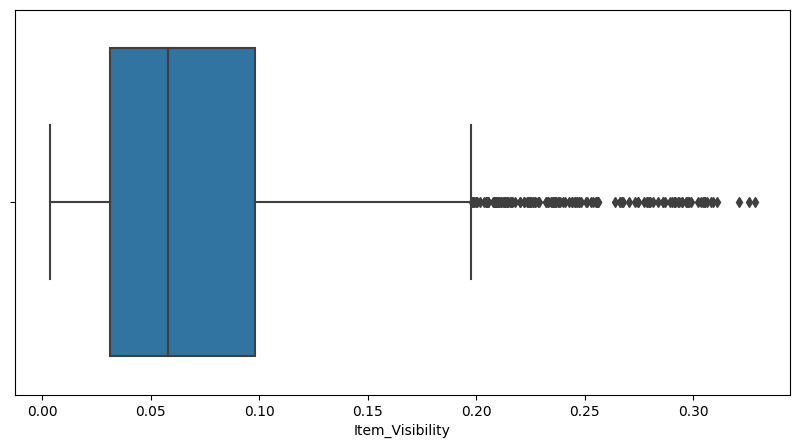

In [48]:
# visualize outlier values
plt.figure(figsize=(10, 5))
sns.boxplot(x='Item_Visibility', data=good_data)
plt.show()

## 2.3 Inconsistent Value:

In [49]:
'''
Inconsistent Values:
- Why?
- Where/When?
- What?
'''

'\nInconsistent Values:\n- Why?\n- Where/When?\n- What?\n'

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [51]:
# Induvidual
'''
------Item_Fat_Content------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178

- Why?: Data is collected form multible sources so it is inconsistent
- Where/When?
- What?:
    - Which majority value ?
    - Replace LF, low fat with Low Fat
'''
# Check data in each column is unique or not
temp_df = df.copy()
temp_df['Item_Code'] = temp_df['Item_Identifier'].apply(lambda id: id[:3])
temp_df.drop(['Item_Identifier', 'Outlet_Identifier', 'source'], axis=1)

for col in temp_df.dtypes[temp_df.dtypes == 'object'].keys():
    print('------{}------'.format(col))
    print(temp_df[col].value_counts())

------Item_Identifier------
Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64
------Item_Fat_Content------
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
------Item_Type------
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
------Outlet_Identifier------
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
O

In [52]:
temp_df['Item_Code'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [53]:
# replace LF, low fat with Low Fat
df_check = df.copy()
df_check['Item_Fat_Content'] = df_check['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [54]:
# Combination
'''
Fixed values: Item_Identifier
Check Feature: Item_Fat_Content, Item_Type
Conclution: No Inconsistent Values

Fixed values: Outlet_Identifier
Check Feature: Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales
Conclution: No Inconsistent Values

'''

df_group = df_check[['Item_Identifier', 'Item_Fat_Content', 'Item_Type']].groupby(by=['Item_Identifier']).nunique()
df_group[df_group['Item_Fat_Content']*df_group['Item_Type'] > 1]

,Item_Fat_Content,Item_Type
Item_Identifier,,


In [55]:
df_group = df_check[['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].groupby(['Outlet_Identifier']).nunique()
df_group[df_group['Outlet_Establishment_Year']*df_group['Outlet_Size']*df_group['Outlet_Location_Type']*df_group['Outlet_Type'] > 1]

,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Outlet_Identifier,,,,


## 2.4 Imbalaned Data

## 2.5 Skewness Data

In [56]:
'''
- Why?: All of skewness is less than 2 => No need remove skewness
- Where/When?
- What?
'''

df.skew()

TypeError: could not convert string to float: 'FDA15'

# Step 3. Feature Understanding :  EDA with Visualization on Univariate, BiVariate and MultiVariate Analysis

## Univariate Analysis

In [ ]:
category_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature != 'source']
category_features

In [ ]:
# plot Item_Fat_Content in pie and countplot chart in seaborn
for col in category_features:
    if col != 'Item_Identifier':
        plt.figure(figsize=(15, 7))
        plt.subplot(1, 2, 1)
        plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
        plt.subplot(1, 2, 2)
        sns.countplot(x=col, data=df)
        plt.show()

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != 'source' and feature != 'Item_Outlet_Sales' and feature != 'Item_Identifier']

for feature in numeric_features:
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)}, sharex=True)
    
    # assigning a graph to each ax
    sns.boxplot(data=df, x=feature, ax=ax_box)
    sns.histplot(data=df, x=feature, ax=ax_hist)

    # removing x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

## Bivariate Analysis

In [ ]:
sns.stripplot(x='Outlet_Location_Type', y='Outlet_Type', data=df)
# => Tier 3 xảy ra phần lớn trong Outlet_Type

In [ ]:
sns.stripplot(x='Outlet_Size', y='Outlet_Type', data=df)


## Multivariate Analysis

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, hue='Outlet_Type')
# Feature cần quan tâm sau đó 1 output và theo 1 nhóm nào đó

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Step 4. Feature Engineering


## Skewness/Inconsistent/Missing/Outlier Handling

In [ ]:
data = df.copy()
data.info()

In [ ]:
# Missing Imputation
'''
- Why?
    1. Query Missing Data
    2. Visualize Missing Data (UniVariate, BiVariate, MultiVariate)
- Whewe/When?
    1. Item_Weight: Tất cả các null đều nằm trong năm 1985
    2. Outlet_Size: không có thông tin đăng kí của 2 cửa hàng này ['OUT045', 'OUT017', 'OUT010']
    3. Item_Visibility: có 0.000000 giá trị này không hợp lý
- What?
    1. Item_Weight: Dựa trên Outlet_Location_Type và Outlet_Type để tìm kiếm các Item_Weight khac có nghia. Sau đó tính trung bình để gán vào NaN
    2. Outlet_Size:
        - Điền Outlet_Size cho Tier 2 và Supermarket Type1 giá trị "Small"
        - Điền Outlet_Size cho Grocery Store có giá trị là "Small"
        => Điền tất cả NaN của Outlet_Size bằng "Small"
    3. Item_Visibility:
        - Genaral Imputation: dùng Median Impuation hoặc là XGBoost để điền giá trị
        - — Knowledge Domain: It the item have the same Item Type and put in the same Outlet Type then we have the same visibility
'''

In [ ]:
# Item_Weight
wt_table = data.pivot_table(values='Item_Weight', index='Item_Identifier')

# impute_weight but not change data type
def impute_weight(cols):
    wt = cols[0]
    id = cols[1]
    
    if pd.isnull(wt):
        wt = wt_table.loc[id]
    return float(wt)

data['Item_Weight'] = data[['Item_Weight', 'Item_Identifier']].apply(impute_weight, axis=1)

In [ ]:
# Check missing again
missing_df = pd.DataFrame({'Missing Percentage': data.isnull().sum()/len(df)*100, 'Total Missing': data.isnull().sum()})
missing_df = missing_df[missing_df['Total Missing'] > 0]
display(missing_df)

In [ ]:
# Outlet_Size
data.fillna({'Outlet_Size': 'Small'}, inplace=True)

In [ ]:
# Check missing again
missing_df = pd.DataFrame({'Missing Percentage': data.isnull().sum()/len(df)*100, 'Total Missing': data.isnull().sum()})
missing_df = missing_df[missing_df['Total Missing'] > 0]
display(missing_df)

In [ ]:
'''
Outlier Values:
Column Item_Visibility: True with threshold -0.068654833 and 0.198167231 (must visualize to see)
- Why?
    1. Query Outlier Values (Describe => IQR)
    2. Visualize Outlier Values (UniVariate, BiVariate, MultiVariate)
- Where/When?
- What?
    -Igore Outlier Values or Impute Outlier Values with Median or Mean
'''

In [ ]:
# Item_Visibility
vs_table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')

def impute_visibility(cols):
    vs = cols[0]
    item = cols[1]
    outlet = cols[2]
    
    if vs == 0 or pd.isnull(vs):
        return vs_table.loc[item, outlet]
    else:
        return vs

data['Item_Visibility'] = data[['Item_Visibility', 'Item_Type', 'Outlet_Type']].apply(impute_visibility, axis=1)

In [ ]:
# Item_Visibility
q1, q2, q3 = data['Item_Visibility'].quantile([0.25, 0.5, 0.75])
min_val, max_val = data['Item_Visibility'].min(), data['Item_Visibility'].max()
iqr = q3 - q1

# replace outlier values with NaN
data.loc[(data['Item_Visibility'] < (q1 - 3 * iqr)) | (data['Item_Visibility'] > (q3 + 3 * iqr)), 'Item_Visibility'] = np.nan
# replace NaN with mean
data['Item_Visibility'] = data[['Item_Visibility', 'Item_Type', 'Outlet_Type']].apply(impute_visibility, axis=1)


In [ ]:
'''
Isconsistent Values:
- Why?: Data is collected form multible sources so it is inconsistent
- Where/When?
- What?:
    - Which majority value ?
    - Replace LF, low fat with Low Fat
'''

In [ ]:
# Replace LF, low fat with Low Fat, reg with Regular
data['Item_Fat_Content'].replace(to_replace=['low fat', 'LF'],value='Low Fat', inplace=True)
data['Item_Fat_Content'].replace(to_replace='reg',value='Regular', inplace=True)
data['Item_Fat_Content'].value_counts()

In [ ]:
# Skew Handling
display(data['Item_Visibility'].skew())
sns.displot(data['Item_Visibility'], kde=True)

In [ ]:
data['Item_Visibility_Sqrt'] = np.sqrt(data['Item_Visibility'])
display(data['Item_Visibility_Sqrt'].skew())
sns.displot(data['Item_Visibility_Sqrt'], kde=True)

In [ ]:
data['Item_Visibility_Log'] = np.log1p(data['Item_Visibility'])
display(data['Item_Visibility_Log'].skew())
sns.displot(data['Item_Visibility_Log'], kde=True)

In [ ]:
# boxcox transformation
from scipy.stats import boxcox
data['Item_Visibility_Boxcox'], lam = boxcox(data['Item_Visibility'])
display(data['Item_Visibility_Boxcox'].skew())
sns.displot(data['Item_Visibility_Boxcox'], kde=True)

## Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding

In [ ]:
# Feature Enrichment
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:3])
data[['Item_Type_Combined', 'Item_Identifier']].head()

data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [ ]:
# Feature Encoding
from sklearn.preprocessing import OrdinalEncoder

e = OrdinalEncoder()

obj = [feature for feature in data.columns if data[feature].dtype == 'O' and feature != 'source' and feature != 'Item_Identifier']

for i in obj:
    data[i] = e.fit_transform(data[i].values.reshape(-1, 1))

In [ ]:
data.info()

## Feature Scaling (Normalization & Standardization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

selected_item_features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility_Boxcox', 'Item_Type', 'Item_MRP', 'Item_Type_Combined']
selected_outlet_features = ['Outlet_Identifier', 'Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target_feature = ['Item_Outlet_Sales']

for col in selected_item_features:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

for col in selected_outlet_features:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))


# Step 5: Dataset Partition:

## Train Test Split

In [ ]:
# Split data train and test
train = data[data['source'] == 'train']
test = data[data['source'] == 'test']

train.drop(columns=['source', 'Item_Identifier'], inplace=True, axis=1)
test.drop(columns=['source', 'Item_Outlet_Sales', 'Item_Identifier'], inplace=True, axis=1)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
display(train.columns)
display(train.head())

## Imbalanced Handling

In [ ]:
# Handle imbalance data target
display(train['Item_Outlet_Sales'].skew())
sns.displot(train['Item_Outlet_Sales'], kde=True)

In [ ]:
train['Item_Outlet_Sales_Boxcox'] = boxcox(train['Item_Outlet_Sales'])
display(train['Item_Outlet_Sales_Boxcox'].skew())
sns.displot(train['Item_Outlet_Sales_Boxcox'], kde=True)

In [ ]:
train['Item_Outlet_Sales_Log'] = np.log1p(train['Item_Outlet_Sales'])
display(train['Item_Outlet_Sales_Log'].skew())
sns.displot(train['Item_Outlet_Sales_Log'], kde=True)

In [ ]:
train['Item_Outlet_Sales_Sqrt'] = np.sqrt(train['Item_Outlet_Sales'])
display(train['Item_Outlet_Sales_Sqrt'].skew())
sns.displot(train['Item_Outlet_Sales_Sqrt'], kde=True)

In [ ]:
train.info()

In [ ]:
train

# Step 6. Data Modelling:

In [ ]:
# Import Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
selected_item_features = ['Item_Type_Combined', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Item_Visibility_Boxcox']
selected_outlet_features = ['Outlet_Identifier', 'Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target_feature = ['Item_Outlet_Sales', 'Item_Outlet_Sales_Boxcox', 'Item_Outlet_Sales_Log', 'Item_Outlet_Sales_Sqrt']

X = train[selected_item_features + selected_outlet_features]
y = train[target_feature[0]]
y1 = train[target_feature[1]]
y2 = train[target_feature[2]]
y3 = train[target_feature[3]]

In [ ]:
# Creating list of models and another list mapped to their name
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), KNeighborsRegressor(), SVR(), XGBRegressor()]
names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor', 'SVR', 'XGBRegressor']

In [ ]:
def create_models(models, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    name = []
    mean_abs = []
    mean_sq = []
    root_mean_sq = []
    r2 = []
    mcv = []

    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = cross_val_score(model, X, y, cv=10)

        # Calculate metrics and add them to list
        name.append(names[i])
        mean_abs.append(np.round(mean_absolute_error(y_test, y_pred),4))
        mean_sq.append(np.round(mean_squared_error(y_test, y_pred),4))
        root_mean_sq.append(np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
        r2.append(np.round(r2_score(y_test, y_pred),4))
        mcv.append(np.round(score.mean(),4)*100)

    # Create dataframe from lists
    evaluation_data = pd.DataFrame(list(zip(name, mean_abs, mean_sq, root_mean_sq, r2, mcv)), columns=['Model', 'Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error', 'R2 Score', 'Cross Validation'])
    return evaluation_data


In [ ]:
evaluation_data = create_models(models, X, y, names)
display(evaluation_data)

In [ ]:
evaluation_data = create_models(models, X, y1, names)
display(evaluation_data)

In [ ]:
evaluation_data = create_models(models, X, y2, names)
display(evaluation_data)

In [ ]:
evaluation_data = create_models(models, X, y3, names)
display(evaluation_data)

In [ ]:
# Print best performance of model
def performance(y_pred, y_test, score, name):
    print(name)
    print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
    print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
    print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
    print('R2 Score:', np.round(r2_score(y_test, y_pred),4))
    print('Cross Validation:', np.round(score.mean()*100,4))
    print('--------------------------------------------------')

# Step 7. Data Evaluation :

In [ ]:
# Feature selection
# Using ANOVA F-value
from sklearn.feature_selection import f_regression, SelectKBest

# Create instance of SelectKBest class
selector = SelectKBest(score_func=f_regression)

# Fit the method to training data
selector.fit(X, y)

# Create dataframe of feature names and scores
feature_scores = pd.DataFrame(list(zip(X.columns, selector.scores_)), columns=['Feature', 'Score']).sort_values(by=['Score'],ascending=False)
display(feature_scores)


In [ ]:
# Using feature importances of Extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor

# Create instance of ExtraTreesRegressor class
model = ExtraTreesRegressor()

# Fit the method to training data
model.fit(X, y)

# Create dataframe of feature names and scores
feature_scores = pd.DataFrame(list(zip(X.columns, model.feature_importances_)), columns=['Feature', 'Score']).sort_values(by=['Score'],ascending=False)
display(feature_scores)

In [ ]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)   
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Step 8. Hyper-parameter Tuning :

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Step 6 => Choose model RandomForestRegressor
params = {'n_estimators': [100, 200, 300, 400, 500],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

# Print best parameters
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:
# Fill best parameters to model
model = RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X, y, cv=10)

# Print performance of model
performance(y_pred, y_test, score, 'RandomForestRegressor')